In [283]:
import matplotlib.pyplot as plt

In [296]:
file1 = open("first_experiment_logs/log_1.1.txt", "r")
file2 = open("first_experiment_logs/log_2.1.txt", "r")
file3 = open("first_experiment_logs/log_3.1.txt", "r")

files = []
files.append(file1)
files.append(file2)
files.append(file3)



In [297]:
lines = []
rates = []

rcmsg_lines = []

for file in files:
    list_doct = []
    rcmsg_line = []
    for line in file:
        line = line[:-1]
        line = line.rsplit(",")
        list_doct.append(line)
        if line[0] == "RecMsg":
            rcmsg_line.append(line)
    rcmsg_lines.append(rcmsg_line)
    rates.append(int(list_doct[1][0][-1]))
    lines.append(list_doct[2:])
    
        



In [298]:
rcmsg_lines[0]


[['RecMsg', '2023-03-08 00:27:13.717381', '0', '5'],
 ['RecMsg', '2023-03-08 00:27:14.056255', '0', '6'],
 ['RecMsg', '2023-03-08 00:27:14.395450', '0', '7'],
 ['RecMsg', '2023-03-08 00:27:15.404940', '0', '11'],
 ['RecMsg', '2023-03-08 00:27:16.079421', '0', '13'],
 ['RecMsg', '2023-03-08 00:27:19.121876', '0', '22'],
 ['RecMsg', '2023-03-08 00:27:20.133102', '0', '30'],
 ['RecMsg', '2023-03-08 00:27:20.809697', '0', '33'],
 ['RecMsg', '2023-03-08 00:27:22.834661', '0', '41'],
 ['RecMsg', '2023-03-08 00:27:23.852981', '0', '44'],
 ['RecMsg', '2023-03-08 00:27:24.866613', '0', '48'],
 ['RecMsg', '2023-03-08 00:27:26.217598', '0', '54'],
 ['RecMsg', '2023-03-08 00:27:28.920693', '0', '64'],
 ['RecMsg', '2023-03-08 00:27:29.259701', '0', '66'],
 ['RecMsg', '2023-03-08 00:27:29.933496', '0', '68'],
 ['RecMsg', '2023-03-08 00:27:30.943638', '0', '73'],
 ['RecMsg', '2023-03-08 00:27:32.968439', '0', '80'],
 ['RecMsg', '2023-03-08 00:27:36.011274', '0', '92'],
 ['RecMsg', '2023-03-08 00:27:3

In [299]:
rates

[3, 2, 4]

In [300]:
file1.close()
file2.close()
file3.close()

In [301]:
log_clocks = []
times = []

for el in lines:
    clock = []
    time = []
    for line in el:
        clock.append(int(line[-1]))
        time.append(line[1])
    log_clocks.append(clock)    
    times.append(time)
    


In [302]:
print(times[0])

['2023-03-08 00:27:12.701391', '2023-03-08 00:27:13.040343', '2023-03-08 00:27:13.378399', '2023-03-08 00:27:13.717381', '2023-03-08 00:27:14.056255', '2023-03-08 00:27:14.395450', '2023-03-08 00:27:14.734975', '2023-03-08 00:27:15.069520', '2023-03-08 00:27:15.404940', '2023-03-08 00:27:15.740791', '2023-03-08 00:27:16.079421', '2023-03-08 00:27:16.418045', '2023-03-08 00:27:16.756788', '2023-03-08 00:27:17.095611', '2023-03-08 00:27:17.434791', '2023-03-08 00:27:17.771251', '2023-03-08 00:27:18.109173', '2023-03-08 00:27:18.445861', '2023-03-08 00:27:18.782836', '2023-03-08 00:27:19.121876', '2023-03-08 00:27:19.458112', '2023-03-08 00:27:19.795906', '2023-03-08 00:27:20.133102', '2023-03-08 00:27:20.470571', '2023-03-08 00:27:20.809697', '2023-03-08 00:27:21.144371', '2023-03-08 00:27:21.483375', '2023-03-08 00:27:21.821004', '2023-03-08 00:27:22.159968', '2023-03-08 00:27:22.496953', '2023-03-08 00:27:22.834661', '2023-03-08 00:27:23.173681', '2023-03-08 00:27:23.514095', '2023-03-

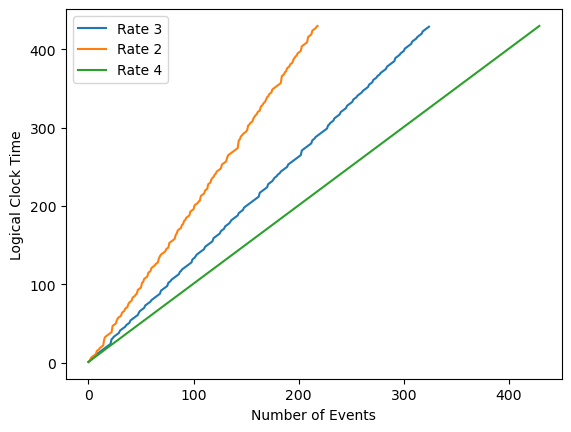

In [303]:
plt.plot([i for i in range(0, len(log_clocks[0]))], log_clocks[0])
plt.plot([i for i in range(0, len(log_clocks[1]))], log_clocks[1])
plt.plot([i for i in range(0, len(log_clocks[2]))], log_clocks[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Number of Events")
plt.ylabel("Logical Clock Time")
plt.show()

In [304]:
gaps = []
for clock in log_clocks:
    gap = [0]
    for i in range(1, len(clock)):
        gap.append(clock[i] - clock[i-1])
    gaps.append(gap)
    
    

In [305]:
from datetime import datetime
import time

rt_elap = []
for clock in times:
    gap = []
    for i in range(0, len(clock)):
        splt = clock[i].rsplit(" ")
        gap.append((datetime.strptime(clock[i], '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(clock[0], '%Y-%m-%d %H:%M:%S.%f')).total_seconds())
    rt_elap.append(gap)
    
    

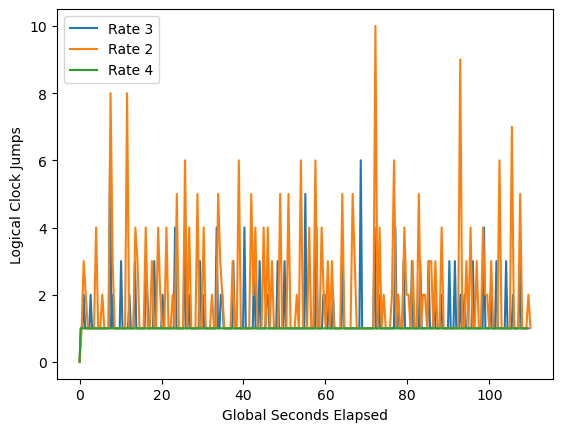

In [306]:
plt.plot(rt_elap[0], gaps[0])
plt.plot(rt_elap[1], gaps[1])
plt.plot(rt_elap[2], gaps[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Global Seconds Elapsed")
plt.ylabel("Logical Clock Jumps")
plt.show()

In [261]:
rt_elap

[[0.0,
  0.338952,
  0.677008,
  1.01599,
  1.354864,
  1.694059,
  2.033584,
  2.368129,
  2.703549,
  3.0394,
  3.37803,
  3.716654,
  4.055397,
  4.39422,
  4.7334,
  5.06986,
  5.407782,
  5.74447,
  6.081445,
  6.420485,
  6.756721,
  7.094515,
  7.431711,
  7.76918,
  8.108306,
  8.44298,
  8.781984,
  9.119613,
  9.458577,
  9.795562,
  10.13327,
  10.47229,
  10.812704,
  11.15159,
  11.487883,
  11.826576,
  12.165222,
  12.502965,
  12.838225,
  13.177053,
  13.516207,
  13.85541,
  14.191495,
  14.530213,
  14.867586,
  15.204968,
  15.544274,
  15.880654,
  16.219302,
  16.55831,
  16.89303,
  17.232105,
  17.571716,
  17.906187,
  18.242247,
  18.581573,
  18.91651,
  19.254915,
  19.594178,
  19.928885,
  20.267048,
  20.604865,
  20.940481,
  21.280071,
  21.618545,
  21.957353,
  22.296538,
  22.631368,
  22.970475,
  23.309883,
  23.649695,
  23.988843,
  24.328239,
  24.668067,
  25.004908,
  25.34438,
  25.680473,
  26.017697,
  26.353348,
  26.690694,
  27.027415,
 

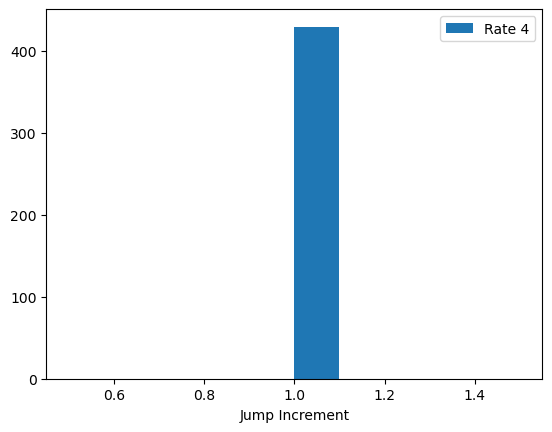

In [262]:
plt.hist(gaps[2])
plt.legend(["Rate " + str(rates[2])])
plt.xlabel("Jump Increment")
plt.show()

In [263]:
drifts = []

for i in range(0, 3):
    drift = []
    gtime = rt_elap[i]
    log_clock_time = log_clocks[i]
    for j in range(0, len(gtime)):
        drift.append((log_clock_time[j])*1/rates[i] - gtime[j])
    drifts.append(drift)

In [264]:
drifts

[[0.3333333333333333,
  0.32771466666666665,
  0.32299199999999995,
  0.6506766666666668,
  0.6451359999999999,
  0.6392743333333335,
  0.6330826666666667,
  0.6318709999999998,
  0.9631176666666663,
  0.9605999999999999,
  0.9553033333333332,
  0.9500126666666668,
  0.9446029999999999,
  0.9391133333333332,
  0.9332666666666674,
  0.9301399999999997,
  0.925551333333333,
  0.9221966666666672,
  0.9185549999999996,
  0.9128483333333328,
  0.9099456666666672,
  0.9054849999999997,
  2.568289,
  2.5641533333333335,
  2.8916939999999993,
  2.8903533333333336,
  2.8846826666666665,
  2.8803870000000007,
  2.874756333333334,
  2.8711046666666658,
  3.5333966666666665,
  3.527710000000001,
  3.520629333333334,
  3.5150766666666655,
  3.512117,
  3.5067573333333346,
  3.834778,
  3.8303683333333325,
  3.8284416666666683,
  3.822946999999999,
  4.483793,
  4.477923333333333,
  4.475171666666668,
  4.469787,
  4.465747333333333,
  4.461698666666669,
  4.455726,
  4.452679333333332,
  5.11403133

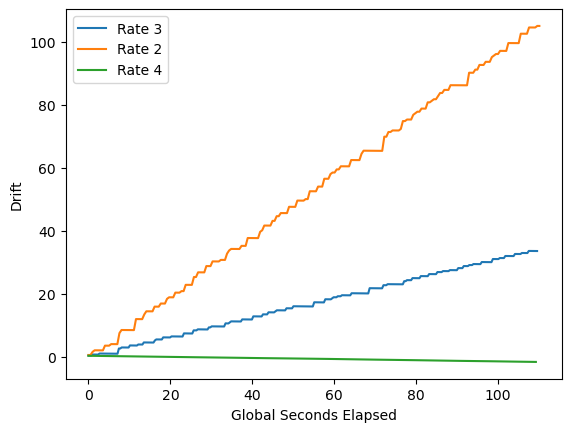

In [265]:
plt.plot(rt_elap[0], drifts[0])
plt.plot(rt_elap[1], drifts[1])
plt.plot(rt_elap[2], drifts[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Global Seconds Elapsed")
plt.ylabel("Drift")
plt.show()

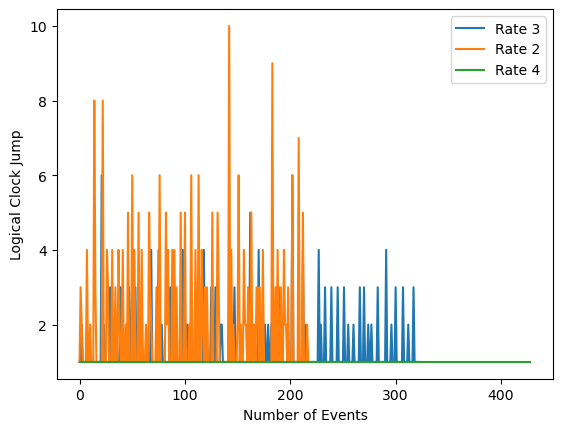

In [198]:
plt.plot([i for i in range(0, len(gaps[0]))], gaps[0])
plt.plot([i for i in range(0, len(gaps[1]))], gaps[1])
plt.plot([i for i in range(0, len(gaps[2]))], gaps[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Number of Events")
plt.ylabel("Logical Clock Jump")
plt.show()